<a href="https://colab.research.google.com/github/BrandoSor4/Text-Mining/blob/main/Brando_Soriano_A1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk

In [ ]:
import pandas as pd

In [ ]:
import requests
url = "https://api.nhtsa.gov/complaints/complaintsByVehicle"

# Parameters for the API request
params = {
    "make": "acura",
    "model": "TLX",
    "modelYear": "2018"
}

# Making the GET request
response = requests.get(url, params=params)

In [ ]:
# Checking if the request was successful
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print("Error: " + str(response.status_code))

{'count': 43, 'message': 'Results returned successfully', 'results': [{'odiNumber': 11564526, 'manufacturer': 'Honda (American Honda Motor Co.)', 'crash': False, 'fire': False, 'numberOfInjuries': 0, 'numberOfDeaths': 0, 'dateOfIncident': '11/20/2023', 'dateComplaintFiled': '01/10/2024', 'vin': '19UUB3F38JA', 'components': 'POWER TRAIN,ENGINE', 'summary': 'there has been a recall out for my vehicle since november 9th or so and i took my car in around the 19th of november because my car started making a loud knocking noise and i initially knew that it was from the recall and so i took it in on the 20th to have it inspected and so when i took it to get inspected and diagnosed to see what was going on.. acura carland told me it from my rod bearing but there was no fix available at the time and so the noise was terrible and i asked if it’s ok to drive on and the service manager hector hernandez told me it was fine just keep up with the old change and see what happens in january which i did

In [ ]:
complaints = pd.DataFrame(data['results'])

In [ ]:
complaints

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.probability import FreqDist

In [ ]:
from wordcloud import WordCloud

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
tokens = nltk.tokenize.word_tokenize(' '.join(complaints['summary'].values))
fdist1 = nltk.FreqDist(tokens)
fdist1.most_common(50)

[('.', 291),
 ('the', 185),
 (',', 145),
 ('and', 143),
 ('THE', 137),
 ('I', 118),
 ('to', 115),
 ('a', 83),
 ('was', 69),
 ('AND', 66),
 ('car', 62),
 ('it', 60),
 ('TO', 57),
 ('my', 55),
 ('A', 50),
 ('is', 46),
 ('on', 45),
 ('that', 42),
 ('in', 41),
 ('of', 41),
 ('THIS', 39),
 ('The', 37),
 ('with', 36),
 ('not', 33),
 ('WAS', 33),
 ('OF', 32),
 ('i', 31),
 ('CAR', 29),
 ('ON', 29),
 ('IN', 29),
 ('vehicle', 28),
 ('this', 28),
 ('had', 27),
 ('Acura', 26),
 ('IS', 26),
 ('for', 25),
 ('engine', 25),
 ('MY', 25),
 ('ACURA', 24),
 ('(', 22),
 (')', 22),
 ('NOT', 22),
 ('have', 21),
 ('IT', 21),
 ('at', 20),
 ('me', 19),
 ('’', 19),
 ('TLX', 18),
 ('HAVE', 18),
 ('THAT', 18)]

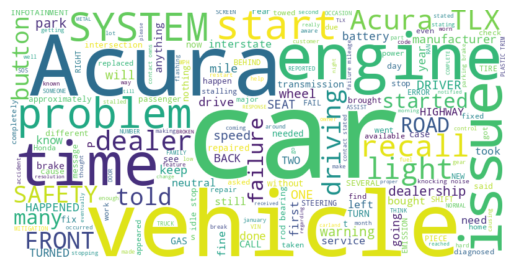

In [ ]:
text_for_wordcloud = ' '.join(complaints['summary'].values)
wc = WordCloud(background_color='white', width=800, height=400).generate(text_for_wordcloud)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## The vehicle, Acura, is a car that has a most prominent occurance of engine problems on this TLx make. Secondly poeple complain having issues with constant service light warnings. Somthing with starting is a reoccurance and I may assume it pertains to the start engine button. From this visualization, a connection on prior knowledge to the car will help understand the wordcloud more.